# **Reading DICOM and NIfTI files**
This example shows how to read DICOM and NIfTI files and check metadata and imagedata in them.
The example files come from https://github.com/hauin/MedicalBioResearchTopics2/tree/main/02_20230914/MRI.

In [ ]:
# !pip install pydicom
# !pip install nibabel
# !pip install SimpleITK
import os
import glob
import pydicom as dcm
import nibabel as nib
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Read DICOM**

In [ ]:
dcmdatadir = "/content/drive/MyDrive/Test/data/MRI/DICOM"
dcmfile = sorted(glob.glob(os.path.join(dcmdatadir,"brain_*.dcm")))

**By pydicom**

In [ ]:
raw = dcm.dcmread(dcmfile[10])

In [ ]:
# metadata
print(raw.StudyDescription, raw.StudyDate)
print(raw.Modality, raw.SequenceName)
print(raw.RepetitionTime, raw.EchoTime)
print(raw.AcquisitionMatrix, raw.SliceThickness)

BRAIN 20010316
MR fse
2300.00 22.0000
[0, 256, 256, 0] 5.00000


In [ ]:
print(raw)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 180
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 0.0.0.0.1.8811.2.11.20010413115754.12432
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 0.0.0.0
(0002, 0013) Implementation Version Name         SH: 'NOTSPECIFIED'
(0002, 0016) Source Application Entity Title     AE: 'NOTSPECIFIED'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'MPR']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 0.0.0.0.1.8811.2.11.20010413115754.12432
(0008, 0020) Study Date                          DA: '20010316'
(0008, 0021) Series Date  

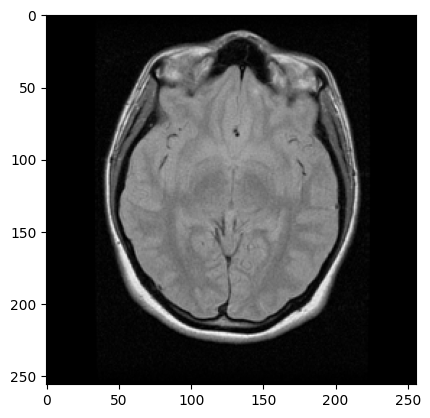

In [ ]:
# image data
image = raw.pixel_array
fig = plt.figure()
plt.imshow(image, cmap="gray")
plt.show()

**By SimpleITK**

In [ ]:
raw = sitk.ReadImage(dcmfile[10])

In [ ]:
# metadata
for k in raw.GetMetaDataKeys():
  v = raw.GetMetaData(k)
  print(f'({k}): "{v}"')

(0008|0008): "ORIGINAL\PRIMARY\MPR"
(0008|0016): "1.2.840.10008.5.1.4.1.1.4"
(0008|0018): "0.0.0.0.1.8811.2.11.20010413115754.12432"
(0008|0020): "20010316"
(0008|0021): "20010316"
(0008|0022): "20010316"
(0008|0023): "20010323"
(0008|0030): "143008"
(0008|0031): "143414"
(0008|0032): "143415"
(0008|0033): "143014"
(0008|0050): ""
(0008|0060): "MR"
(0008|0070): "GE Medical Systems"
(0008|0080): "                            "
(0008|0090): "    "
(0008|1010): "MRS1"
(0008|1030): "BRAIN "
(0008|103e): "FSE PD AXIAL OBL"
(0008|1050): "      "
(0008|1070): "EC"
(0008|1090): "SIGNA "
(0010|0010): "              "
(0010|0020): "123565"
(0010|0030): ""
(0010|0040): "F "
(0010|1010): "028Y"
(0010|1030): "61.2350 "
(0010|21b0): ""
(0018|0020): "SE"
(0018|0021): "SK"
(0018|0022): "SP"
(0018|0023): "2D"
(0018|0024): "fse "
(0018|0050): "5.00000 "
(0018|0080): "2300.00 "
(0018|0081): "22.0000 "
(0018|0083): "1.00000 "
(0018|0084): "63.8615 "
(0018|0086): "1 "
(0018|0087): "1.50000 "
(0018|0088): "2

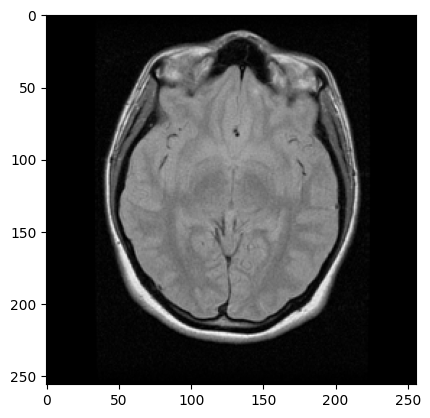

In [ ]:
# image data
image = sitk.GetArrayFromImage(raw)
fig = plt.figure()
plt.imshow(image[0,:,:], cmap="gray")
plt.show()

## **Read NIfTI**

In [ ]:
niidatadir = "/content/drive/MyDrive/Test/data/MRI/NIfTI"
niifile = os.path.join(niidatadir,"single_subj_T1.nii")

**By nibabel**

In [ ]:
# via nibabel
raw = nib.load(niifile)

In [ ]:
# metadata
meta = raw.header
print(meta)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'NIFTI-1 Image'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-2.  0.  0

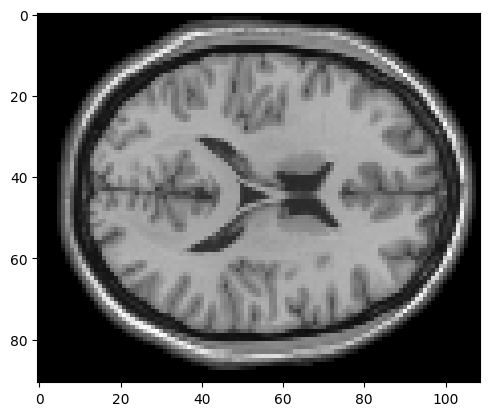

In [ ]:
# image data
image = raw.get_fdata()
fig = plt.figure()
plt.imshow(image[:, :, 45], cmap="gray")
plt.show()

**By SimpleITK**

In [ ]:
# via SimpleITK
raw = sitk.ReadImage(niifile)

In [ ]:
# metadata
for k in raw.GetMetaDataKeys():
  v = raw.GetMetaData(k)
  print(f'({k}): "{v}"')

(ITK_FileNotes): "NIFTI-1 Image"
(ITK_original_direction): "[UNKNOWN_PRINT_CHARACTERISTICS]
"
(ITK_original_spacing): "[UNKNOWN_PRINT_CHARACTERISTICS]
"
(aux_file): ""
(bitpix): "8"
(cal_max): "0"
(cal_min): "0"
(datatype): "2"
(descrip): "NIFTI-1 Image"
(dim[0]): "3"
(dim[1]): "91"
(dim[2]): "109"
(dim[3]): "91"
(dim[4]): "1"
(dim[5]): "1"
(dim[6]): "1"
(dim[7]): "1"
(dim_info): "0"
(intent_code): "0"
(intent_name): ""
(intent_p1): "0"
(intent_p2): "0"
(intent_p3): "0"
(nifti_type): "1"
(pixdim[0]): "0"
(pixdim[1]): "2"
(pixdim[2]): "2"
(pixdim[3]): "2"
(pixdim[4]): "0"
(pixdim[5]): "0"
(pixdim[6]): "0"
(pixdim[7]): "0"
(qfac): "[UNKNOWN_PRINT_CHARACTERISTICS]
"
(qform_code): "2"
(qform_code_name): "NIFTI_XFORM_ALIGNED_ANAT"
(qoffset_x): "90"
(qoffset_y): "-126"
(qoffset_z): "-72"
(qto_xyz): "[UNKNOWN_PRINT_CHARACTERISTICS]
"
(quatern_b): "0"
(quatern_c): "1"
(quatern_d): "0"
(scl_inter): "0"
(scl_slope): "0.00390619"
(sform_code): "2"
(sform_code_name): "NIFTI_XFORM_ALIGNED_ANAT"
(sl

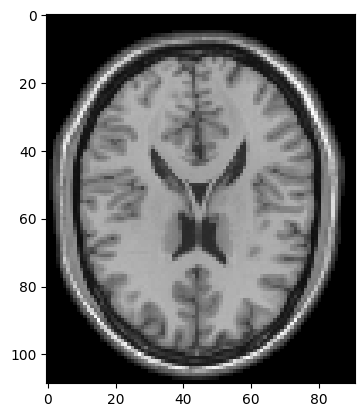

In [ ]:
# image data
image = sitk.GetArrayFromImage(raw)
fig = plt.figure()
plt.imshow(image[45,:,:], cmap="gray")
plt.show()